In [2]:
import pandas as pnd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

tf.config.set_visible_devices([], 'GPU')

#Définition de la longueur et de la largeur de l'image
LONGUEUR_IMAGE = 28
LARGEUR_IMAGE = 28

#Chargement des images
observations_entrainement = pnd.read_csv('datas/fashion-mnist_train.csv')


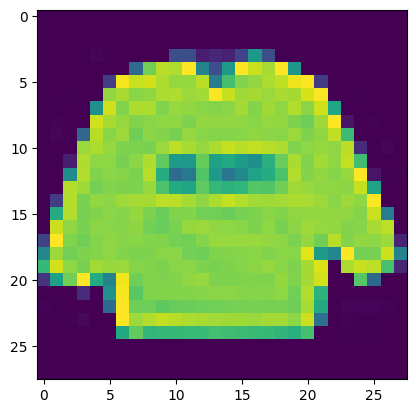

In [3]:
#On exclut la première colonne (les labels) pour constituer un tableau de pixels
X = np.array(observations_entrainement.iloc[:, 1:])

premiereImage = X[0]
premiereImage = premiereImage.reshape([LONGUEUR_IMAGE,LARGEUR_IMAGE])
plt.imshow(premiereImage)
plt.show()

In [4]:
#On crée des catégories à l'aide du module Keras
y = keras.utils.to_categorical(np.array(observations_entrainement.iloc[:,0]))
#Répartition des données d'entrainement en données d'apprentissage et données de validation
#80% de donnée d'apprentissage et 20% de donnée de validation
X_apprentissage, X_validation, y_apprentissage, y_validation = train_test_split(X, y, test_size=0.2, random_state=13)


In [5]:
# On redimensionne les images au format 28*28 et on réalise un scaling sur les données des pixels
X_apprentissage = X_apprentissage.reshape(X_apprentissage.shape[0], 
                                          LARGEUR_IMAGE, 
                                          LONGUEUR_IMAGE, 1)
X_apprentissage = X_apprentissage.astype('float32')
X_apprentissage /= 255

X_validation = X_validation.reshape(X_validation.shape[0], 
                                    LARGEUR_IMAGE, 
                                    LONGUEUR_IMAGE, 1)
X_validation = X_validation.astype('float32')
X_validation /= 255


In [6]:
#Preparation des données de tests
observations_test = pnd.read_csv('datas/fashion-mnist_test.csv')
X_test = np.array(observations_test.iloc[:, 1:])
y_test = tf.keras.utils.to_categorical(np.array(observations_test.iloc[:, 0]))
X_test = X_test.reshape(X_test.shape[0], 
                        LARGEUR_IMAGE, 
                        LONGUEUR_IMAGE, 1)
X_test = X_test.astype('float32')
X_test /= 255

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

# On spécifie les dimensions de l'image d'entrée
dimentionImage = (LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)

# On crée le réseau de neurones couche par couche
reseauNeurone1Convolution = Sequential()

# Ajout de la couche d'entrée
reseauNeurone1Convolution.add(Input(shape=dimentionImage))

#1- Ajout de la couche de convolution comportant
# 32 filtres de de taille 3x3 (Kernel) parcourant l'image
# Une fonction d'activation de type ReLU (Rectified Linear Activation)
# Une image d'entrée de 28px * 28 px 
reseauNeurone1Convolution.add(Conv2D(32, 
                                     kernel_size=(3, 3), 
                                     activation='relu'))

#2- Définition de la fonction de pooling avec une fenêtre de 2px sur 2 px
reseauNeurone1Convolution.add(MaxPooling2D(pool_size=(2, 2)))

#3- Ajout d'une fonction d'ignorance
reseauNeurone1Convolution.add(Dropout(0.2))

#5 - On transforme en une seule ligne
reseauNeurone1Convolution.add(Flatten())

#6 - Ajout d'un réseau de neurones composé de 128 neurones avec 
# une fonction d'activation de type ReLU
reseauNeurone1Convolution.add(Dense(128, activation='relu'))

#7 - Ajout d'un réseau de ne
# urones composé de 10 neurones avec une 
# fonction d'activation de type softmax
reseauNeurone1Convolution.add(Dense(10, activation='softmax'))


In [8]:
reseauNeurone1Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])


In [ ]:
historique_apprentissage = reseauNeurone1Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))


Epoch 1/10


2025-11-18 03:13:45.022470: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 150528000 exceeds 10% of free system memory.


188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7995 - loss: 0.5669 - val_accuracy: 0.8591 - val_loss: 0.4033
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8717 - loss: 0.3646 - val_accuracy: 0.8823 - val_loss: 0.3404
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8882 - loss: 0.3176 - val_accuracy: 0.8890 - val_loss: 0.3176
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8978 - loss: 0.2888 - val_accuracy: 0.8940 - val_loss: 0.2970
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9040 - loss: 0.2689 - val_accuracy: 0.8964 - val_loss: 0.2850
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9099 - loss: 0.2500 - val_accuracy: 0.9025 - val_loss: 0.2702
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9147 - loss: 0.2356 - val_accuracy: 0.9069 - val_loss: 0.2637
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9193 - loss: 0.2213 - val_accuracy: 0.907

In [10]:
evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])


Erreur: 0.23977036774158478
Précision: 0.9144999980926514


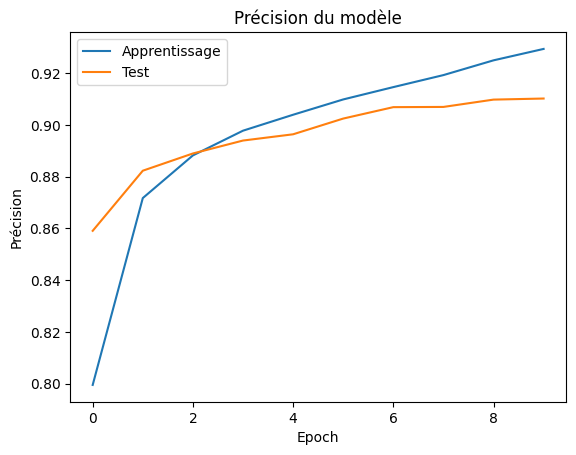

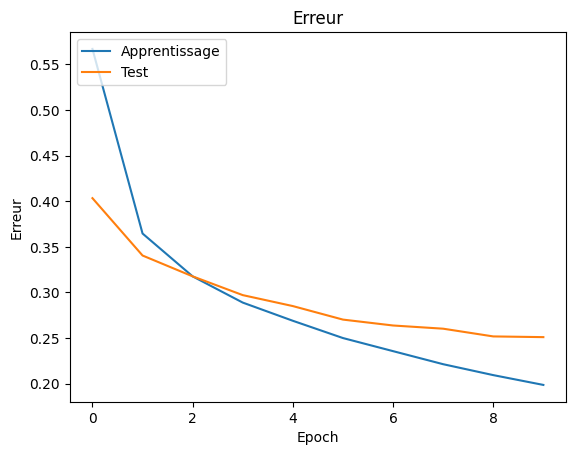

In [11]:
plt.plot(historique_apprentissage.history['accuracy'])
plt.plot(historique_apprentissage.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(historique_apprentissage.history['loss'])
plt.plot(historique_apprentissage.history['val_loss'])
plt.title('Erreur')
plt.ylabel('Erreur')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generateur_images = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    shear_range=0.3,
    height_shift_range=0.08,
    zoom_range=0.08)


In [13]:
nouvelles_images_apprentissage = generateur_images.flow(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256)

nouvelles_images_validation = generateur_images.flow(
    X_validation, 
    y_validation,
    batch_size=256)


In [14]:
historique_apprentissage = reseauNeurone1Convolution.fit(
    nouvelles_images_apprentissage,
    steps_per_epoch=48000//256,
    epochs=50,
    validation_data=nouvelles_images_validation,
    validation_steps=12000//256,
    verbose=1 )

evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Précision:', evaluation[1])

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8290 - loss: 0.4613 - val_accuracy: 0.8443 - val_loss: 0.4201
Epoch 2/50
  1/187 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8281 - loss: 0.4549

/home/vscode/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8281 - loss: 0.4549 - val_accuracy: 0.8411 - val_loss: 0.4222
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8498 - loss: 0.4063 - val_accuracy: 0.8543 - val_loss: 0.3991
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8125 - loss: 0.4640 - val_accuracy: 0.8510 - val_loss: 0.3975
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8534 - loss: 0.3919 - val_accuracy: 0.8664 - val_loss: 0.3663
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8125 - loss: 0.4668 - val_accuracy: 0.8623 - val_loss: 0.3718
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8619 - loss: 0.3718 - val_accuracy: 0.8674 - val_loss: 0.3674
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8555 - loss: 0.3698 - val_accuracy: 0.8652 - val_loss: 0.3645
Epoch 9/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8655 - loss: 0.3619 - val_accuracy: 0.8728 - 

In [15]:
#Sauvegarde du modèle
# Serialisation du modèle 
model_json = reseauNeurone1Convolution.to_json() 
with open("modele/modele.json", "w") as json_file:
    json_file.write(model_json)
    
# Serialisation des poids
reseauNeurone1Convolution.save_weights("modele/modele.weights.h5")
print("Modèle sauvegardé !")


Modèle sauvegardé !


In [16]:
from keras.layers import BatchNormalization

reseauNeurones4Convolution = Sequential()

reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=dimentionImage))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Flatten())
reseauNeurones4Convolution.add(Dense(512, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(128, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(10, activation='softmax'))


/home/vscode/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
reseauNeurones4Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])


In [18]:
historique_apprentissage = reseauNeurones4Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))

Epoch 1/10


2025-11-18 03:23:10.036252: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 150528000 exceeds 10% of free system memory.


188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - accuracy: 0.7340 - loss: 0.7507 - val_accuracy: 0.1996 - val_loss: 2.6807
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 112ms/step - accuracy: 0.8424 - loss: 0.4406 - val_accuracy: 0.3627 - val_loss: 2.6681
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.8687 - loss: 0.3677 - val_accuracy: 0.8375 - val_loss: 0.4536
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.8831 - loss: 0.3291 - val_accuracy: 0.8842 - val_loss: 0.3157
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.8912 - loss: 0.3043 - val_accuracy: 0.8942 - val_loss: 0.2830
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 112ms/step - accuracy: 0.8985 - loss: 0.2853 - val_accuracy: 0.9047 - val_loss: 0.2739
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - accuracy: 0.9041 - loss: 0.2682 - val_accuracy: 0.8969 - val_loss: 0.2867
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 118ms/step - accuracy: 0.9093 - loss: 0.2537 - val

In [19]:
evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])


Erreur: 0.263018399477005
Précision: 0.9047999978065491


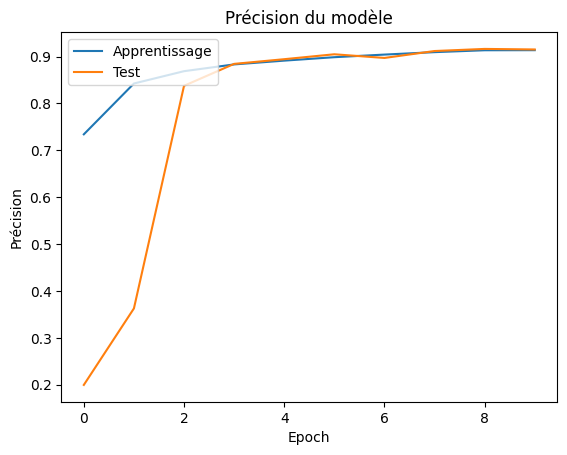

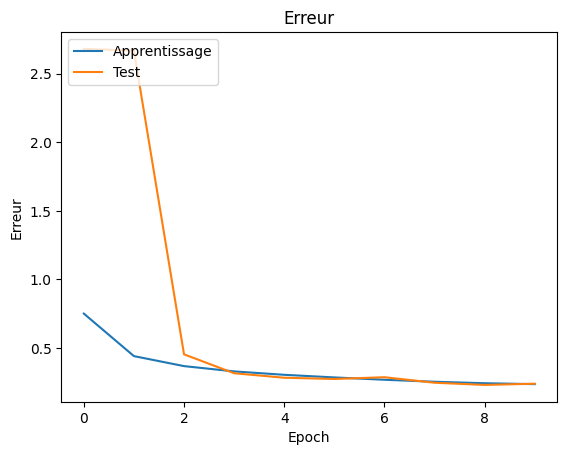

In [20]:
plt.plot(historique_apprentissage.history['accuracy'])
plt.plot(historique_apprentissage.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(historique_apprentissage.history['loss'])
plt.plot(historique_apprentissage.history['val_loss'])
plt.title('Erreur')
plt.ylabel('Erreur')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generateur_images = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    shear_range=0.3,
    height_shift_range=0.08,
    zoom_range=0.08)


In [22]:
nouvelles_images_apprentissage = generateur_images.flow(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256)

nouvelles_images_validation = generateur_images.flow(
    X_validation, 
    y_validation,
    batch_size=256)


In [23]:
historique_apprentissage = reseauNeurone1Convolution.fit(
    nouvelles_images_apprentissage,
    steps_per_epoch=48000//256,
    epochs=50,
    validation_data=nouvelles_images_validation,
    validation_steps=12000//256,
    verbose=1 )

evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Précision:', evaluation[1])


Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8969 - loss: 0.2788 - val_accuracy: 0.8932 - val_loss: 0.2903
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9102 - loss: 0.2328 - val_accuracy: 0.8949 - val_loss: 0.2875
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8955 - loss: 0.2783 - val_accuracy: 0.8956 - val_loss: 0.2838
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9102 - loss: 0.2365 - val_accuracy: 0.8929 - val_loss: 0.2888
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8981 - loss: 0.2728 - val_accuracy: 0.8956 - val_loss: 0.2807
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9375 - loss: 0.1902 - val_accuracy: 0.8968 - val_loss: 0.2869
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8971 - loss: 0.2746 - val_accuracy: 0.8895 - val_loss: 0.2951
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8945 - loss: 0.2835 - val_accuracy

In [24]:
#Sauvegarde du modèle
# Serialisation du modèle 
model_json = reseauNeurone1Convolution.to_json() 
with open("modele/modele.json", "w") as json_file:
    json_file.write(model_json)
    
# Serialisation des poids
reseauNeurone1Convolution.save_weights("modele/modele.weights.h5")
print("Modèle sauvegardé !")


Modèle sauvegardé !


In [25]:
from keras.layers import BatchNormalization

reseauNeurones4Convolution = Sequential()

reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=dimentionImage))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Flatten())
reseauNeurones4Convolution.add(Dense(512, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(128, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(10, activation='softmax'))


In [26]:
reseauNeurones4Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])


In [27]:
historique_apprentissage = reseauNeurones4Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))


Epoch 1/10


2025-11-18 03:29:34.131592: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 150528000 exceeds 10% of free system memory.


188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 112ms/step - accuracy: 0.7374 - loss: 0.7566 - val_accuracy: 0.1059 - val_loss: 3.7433
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.8460 - loss: 0.4344 - val_accuracy: 0.4304 - val_loss: 1.9663
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 0.8716 - loss: 0.3668 - val_accuracy: 0.8390 - val_loss: 0.4361
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 112ms/step - accuracy: 0.8839 - loss: 0.3269 - val_accuracy: 0.8897 - val_loss: 0.3081
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 122ms/step - accuracy: 0.8923 - loss: 0.3035 - val_accuracy: 0.8883 - val_loss: 0.3030
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 24s 128ms/step - accuracy: 0.8996 - loss: 0.2833 - val_accuracy: 0.8988 - val_loss: 0.2773
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 25s 133ms/step - accuracy: 0.9049 - loss: 0.2665 - val_accuracy: 0.9093 - val_loss: 0.2487
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 26s 141ms/step - accuracy: 0.9100 - loss: 0.2518 - val

In [ ]:
evaluation = reseauNeurones4Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])


Erreur: 0.2302827686071396
Précision: 0.9225000143051147


In [ ]:
historique_apprentissage = reseauNeurones4Convolution.fit(
    nouvelles_images_apprentissage,
    steps_per_epoch=48000//256,
    epochs=50,
    validation_data=nouvelles_images_validation,
    validation_steps=12000//256,
    verbose=1 )

evaluation = reseauNeurones4Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Précision:', evaluation[1])


Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 65s 334ms/step - accuracy: 0.8525 - loss: 0.4107 - val_accuracy: 0.8741 - val_loss: 0.3375
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8477 - loss: 0.3964 - val_accuracy: 0.8770 - val_loss: 0.3325
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 61s 324ms/step - accuracy: 0.8675 - loss: 0.3669 - val_accuracy: 0.8636 - val_loss: 0.3700
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8477 - loss: 0.4847 - val_accuracy: 0.8702 - val_loss: 0.3467
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 83s 443ms/step - accuracy: 0.8748 - loss: 0.3439 - val_accuracy: 0.8805 - val_loss: 0.3144
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8906 - loss: 0.3054 - val_accuracy: 0.8838 - val_loss: 0.3102
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 64s 342ms/step - accuracy: 0.8797 - loss: 0.3338 - val_accuracy: 0.8735 - val_loss: 0.3364
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8984 - loss: 0.3181 - 

In [ ]:
#Sauvegarde du modèle
# Serialisation du modèle 
model_json = reseauNeurone1Convolution.to_json() 
with open("modele/modele.json", "w") as json_file:
    json_file.write(model_json)
    
# Serialisation des poids
reseauNeurone1Convolution.save_weights("modele/modele.weights.h5")
print("Modèle sauvegardé !")


Modèle sauvegardé !


In [17]:
from keras.layers import BatchNormalization

reseauNeurones4Convolution = Sequential()

reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=dimentionImage))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Flatten())
reseauNeurones4Convolution.add(Dense(512, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(128, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(10, activation='softmax'))


/home/vscode/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
reseauNeurones4Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])


In [ ]:
historique_apprentissage = reseauNeurones4Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))


Epoch 1/10


2025-11-17 23:56:11.114966: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 150528000 exceeds 10% of free system memory.


188/188 ━━━━━━━━━━━━━━━━━━━━ 69s 328ms/step - accuracy: 0.7384 - loss: 0.7630 - val_accuracy: 0.1508 - val_loss: 3.0045
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 60s 317ms/step - accuracy: 0.8418 - loss: 0.4433 - val_accuracy: 0.3957 - val_loss: 2.0066
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 63s 336ms/step - accuracy: 0.8675 - loss: 0.3697 - val_accuracy: 0.7924 - val_loss: 0.6158
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 64s 341ms/step - accuracy: 0.8826 - loss: 0.3275 - val_accuracy: 0.8894 - val_loss: 0.3058
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 83s 345ms/step - accuracy: 0.8927 - loss: 0.3039 - val_accuracy: 0.8976 - val_loss: 0.2793
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 79s 331ms/step - accuracy: 0.8972 - loss: 0.2867 - val_accuracy: 0.9068 - val_loss: 0.2477
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 65s 343ms/step - accuracy: 0.9024 - loss: 0.2745 - val_accuracy: 0.8936 - val_loss: 0.2883
Epoch 8/10


In [28]:
evaluation = reseauNeurones4Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])


Erreur: 0.20784910023212433
Précision: 0.9240999817848206


In [29]:
historique_apprentissage = reseauNeurones4Convolution.fit(
    nouvelles_images_apprentissage,
    steps_per_epoch=48000//256,
    epochs=50,
    validation_data=nouvelles_images_validation,
    validation_steps=12000//256,
    verbose=1 )

evaluation = reseauNeurones4Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Précision:', evaluation[1])


Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.8556 - loss: 0.4012 - val_accuracy: 0.8706 - val_loss: 0.3453
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8633 - loss: 0.3648 - val_accuracy: 0.8654 - val_loss: 0.3545
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.8701 - loss: 0.3584 - val_accuracy: 0.8734 - val_loss: 0.3459
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8516 - loss: 0.3422 - val_accuracy: 0.8688 - val_loss: 0.3531
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 39s 105ms/step - accuracy: 0.8767 - loss: 0.3407 - val_accuracy: 0.8841 - val_loss: 0.3081
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9180 - loss: 0.2346 - val_accuracy: 0.8848 - val_loss: 0.3098
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 0.8789 - loss: 0.3319 - val_accuracy: 0.8884 - val_loss: 0.3086
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8711 - loss: 0.3875 - val_

In [ ]:
evaluation = reseauNeurones4Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])

Erreur: 0.1889190673828125
Précision: 0.9337999820709229
